<a href="https://cognitiveclass.ai"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork/images/IDSN-logo.png" width="400"> </a>

# Convolutional Neural Networks with Keras

Estimated time needed **30** mins


In this lab, we will learn how to use the Keras library to build convolutional neural networks. We will also use the popular MNIST dataset and we will compare our results to using a conventional neural network.


## Objectives for this Notebook    
* How to use the Keras library to build convolutional neural networks
* Convolutional neural network with one set of convolutional and pooling layers
* Convolutional neural network with two sets of convolutional and pooling layers



## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
      
1. <a href="#item41">Import Keras and Packages</a>   
2. <a href="#item42">Convolutional Neural Network with One Set of Convolutional and Pooling Layers</a>  
3. <a href="#item43">Convolutional Neural Network with Two Sets of Convolutional and Pooling Layers</a>  

</font>
</div>


<a id='item41'></a>


## Import Keras and Packages


Let's start by importing the keras libraries and the packages that we would need to build a neural network.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented. 
# If you run this notebook on a different environment, e.g. your desktop, you may need to uncomment and install certain libraries.

#!pip install numpy==2.0.2
#!pip install pandas==2.2.2
#!pip install tensorflow_cpu==2.18.0
#!pip install matplotlib==3.9.2

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical

2025-01-21 00:10:57.500886: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737414657.542210   97249 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737414657.553736   97249 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-21 00:10:57.591257: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


When working with convolutional neural networks in particular, we will need additional packages.


In [3]:
from keras.layers import Conv2D # to add convolutional layers
from keras.layers import MaxPooling2D # to add pooling layers
from keras.layers import Flatten # to flatten data for fully connected layers

<a id='item42'></a>


## Convolutional Neural Network with One Set of Convolutional and Pooling Layers


In [4]:
# import data
from keras.datasets import mnist

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

Let's normalize the pixel values to be between 0 and 1


In [5]:
X_train = X_train / 255 # normalize training data
X_test = X_test / 255 # normalize test data

Next, let's convert the target variable into binary categories


In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1] # number of categories

Next, let's define a function that creates our model. Let's start with one set of convolutional and pooling layers.


In [8]:
def convolutional_model():
    
    # create model
    model = Sequential()
    
    model.add(Input(shape=(28, 28, 1)))
    model.add(Conv2D(16, (5, 5), strides=(1, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

Finally, let's call the function to create the model, and then let's train it and evaluate it.


In [9]:
# build the model
model = convolutional_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

2025-01-21 00:17:22.903190: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
300/300 - 22s - 72ms/step - accuracy: 0.9113 - loss: 0.3063 - val_accuracy: 0.9634 - val_loss: 0.1198
Epoch 2/10
300/300 - 24s - 81ms/step - accuracy: 0.9718 - loss: 0.0966 - val_accuracy: 0.9750 - val_loss: 0.0813
Epoch 3/10
300/300 - 20s - 67ms/step - accuracy: 0.9809 - loss: 0.0635 - val_accuracy: 0.9833 - val_loss: 0.0551
Epoch 4/10
300/300 - 19s - 65ms/step - accuracy: 0.9858 - loss: 0.0477 - val_accuracy: 0.9833 - val_loss: 0.0485
Epoch 5/10
300/300 - 18s - 61ms/step - accuracy: 0.9891 - loss: 0.0372 - val_accuracy: 0.9846 - val_loss: 0.0438
Epoch 6/10
300/300 - 21s - 71ms/step - accuracy: 0.9913 - loss: 0.0298 - val_accuracy: 0.9867 - val_loss: 0.0420
Epoch 7/10
300/300 - 21s - 71ms/step - accuracy: 0.9919 - loss: 0.0261 - val_accuracy: 0.9862 - val_loss: 0.0433
Epoch 8/10
300/300 - 18s - 60ms/step - accuracy: 0.9937 - loss: 0.0217 - val_accuracy: 0.9873 - val_loss: 0.0386
Epoch 9/10
300/300 - 16s - 53ms/step - accuracy: 0.9944 - loss: 0.0186 - val_accuracy: 0.9881 - 

In [19]:
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Accuracy: 0.9884999990463257 
 Error: 1.1500000953674316


## Inspecting the model:

In [20]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 8)      │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,140 (258.36 KB)

 Trainable params: 22,046 (86.12 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,094 (172.25 KB)

None


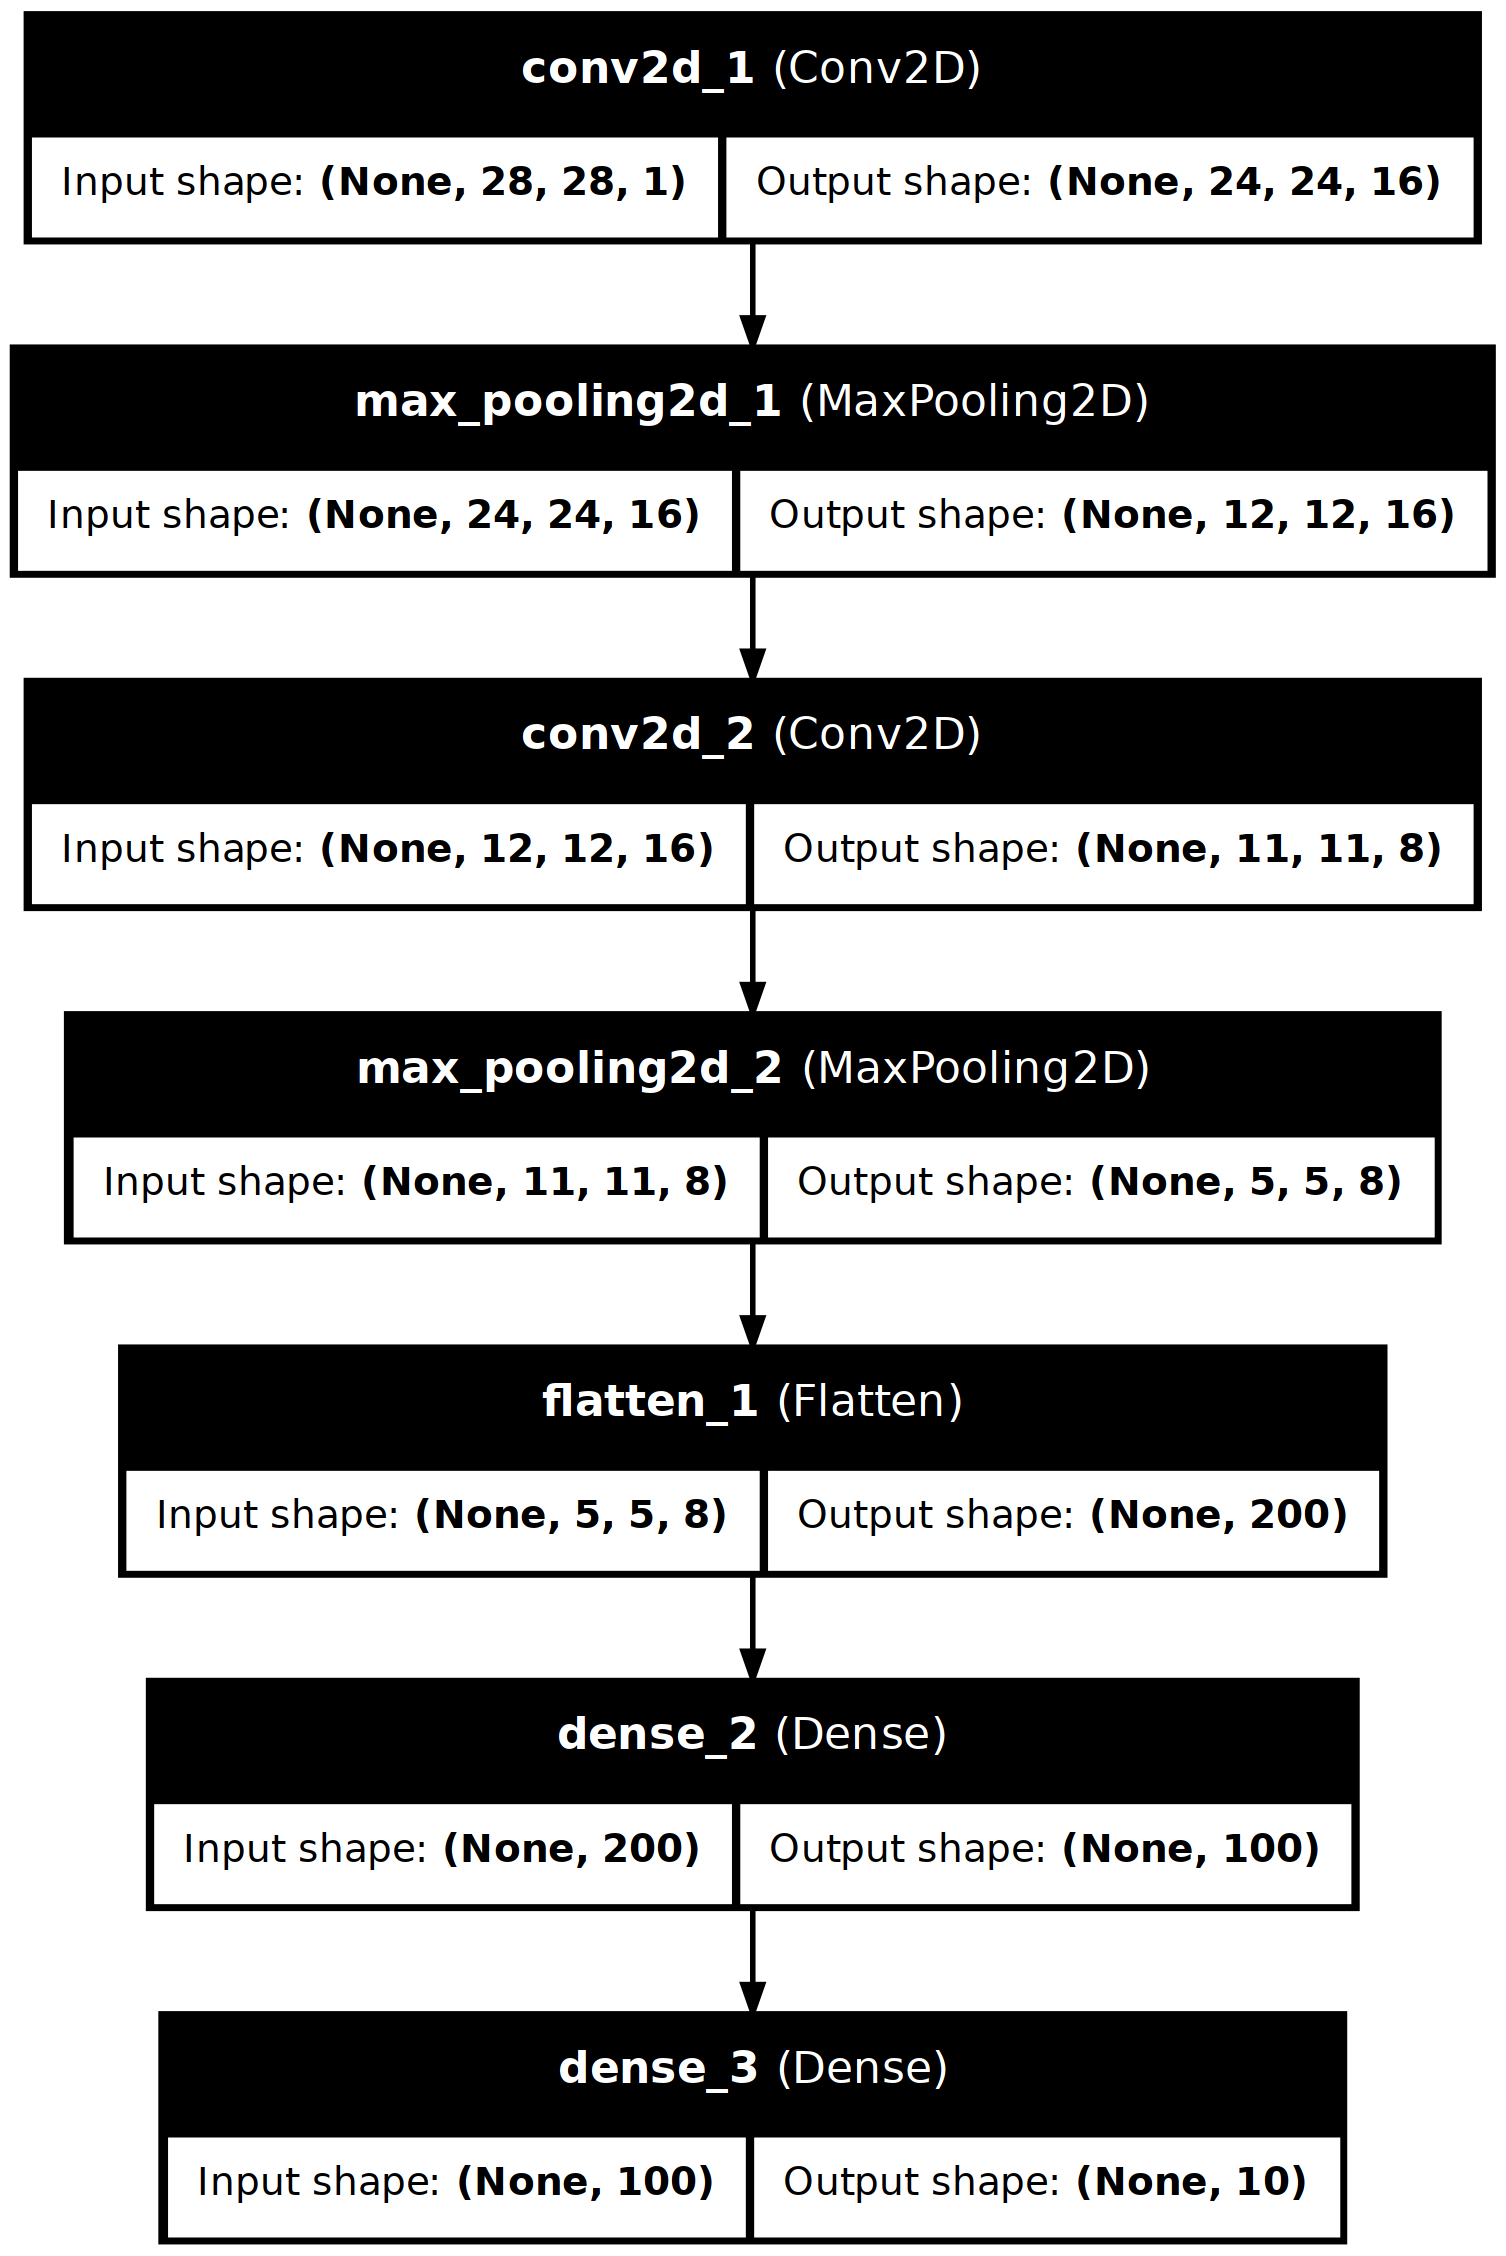

In [22]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

------------------------------------------


<a id='item43'></a>


## Convolutional Neural Network with Two Sets of Convolutional and Pooling Layers


Let's redefine our convolutional model so that it has two convolutional and pooling layers instead of just one layer of each.


In [12]:
def convolutional_model_2():
    
    # create model
    model = Sequential()
    
    model.add(Input(shape=(28, 28, 1)))
    model.add(Conv2D(16, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(8, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

Now, let's call the function to create our new convolutional neural network, and then let's train it and evaluate it.


In [13]:
# build the model
model = convolutional_model_2()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 18s - 60ms/step - accuracy: 0.8576 - loss: 0.4975 - val_accuracy: 0.9542 - val_loss: 0.1581
Epoch 2/10
300/300 - 15s - 49ms/step - accuracy: 0.9621 - loss: 0.1288 - val_accuracy: 0.9745 - val_loss: 0.0829
Epoch 3/10
300/300 - 23s - 77ms/step - accuracy: 0.9742 - loss: 0.0851 - val_accuracy: 0.9796 - val_loss: 0.0623
Epoch 4/10
300/300 - 24s - 79ms/step - accuracy: 0.9792 - loss: 0.0685 - val_accuracy: 0.9827 - val_loss: 0.0534
Epoch 5/10
300/300 - 18s - 59ms/step - accuracy: 0.9819 - loss: 0.0599 - val_accuracy: 0.9853 - val_loss: 0.0480
Epoch 6/10
300/300 - 15s - 51ms/step - accuracy: 0.9843 - loss: 0.0513 - val_accuracy: 0.9830 - val_loss: 0.0487
Epoch 7/10
300/300 - 18s - 60ms/step - accuracy: 0.9864 - loss: 0.0459 - val_accuracy: 0.9861 - val_loss: 0.0415
Epoch 8/10
300/300 - 18s - 61ms/step - accuracy: 0.9871 - loss: 0.0423 - val_accuracy: 0.9865 - val_loss: 0.0401
Epoch 9/10
300/300 - 14s - 47ms/step - accuracy: 0.9885 - loss: 0.0383 - val_accuracy: 0.9855 - 

In [18]:
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Accuracy: 0.9884999990463257 
 Error: 1.1500000953674316


## Inspecting the model:

In [23]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 8)      │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,140 (258.36 KB)

 Trainable params: 22,046 (86.12 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,094 (172.25 KB)

None


### Thank you for completing this lab!

This notebook was created by [Alex Aklson](https://www.linkedin.com/in/aklson/). I hope you found this lab interesting and educational. Feel free to contact me if you have any questions!


<!--
## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2024-11-20  | 3.0  | Aman  |  Updated the library versions to current |
| 2020-09-21  | 2.0  | Srishti  |  Migrated Lab to Markdown and added to course repo in GitLab |



<hr>

## <h3 align="center"> © IBM Corporation. All rights reserved. <h3/>


<hr>

Copyright &copy; [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://opensource.org/license/mit).
